In [1]:
import tsp
import time
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

In [2]:
city_df = pd.read_excel('List_of_cities.xlsx', sheet_name='Sheet1')
List_of_cities = city_df['Cities'].tolist()
List_of_cities

['Delhi', 'Kolkata', 'Bhopal', 'Mumbai', 'Guwahati', 'Salem']

In [3]:
Source_cities, Destination_cities = [], []
for city1 in List_of_cities:
    for city2 in List_of_cities:
        Source_cities.append(city1)
        Destination_cities.append(city2)

In [4]:
def Calculate_Distance(src, dst):
    try:
        # Select source city
        s1 = driver.find_element_by_id("distancefrom")
        s1.clear()
        s1.send_keys(src)
        s1.send_keys(Keys.RETURN)

        # Select destination city
        d1 = driver.find_element_by_id("distanceto")
        d1.clear()
        d1.send_keys(dst)
        d1.send_keys(Keys.RETURN)

        # Click radio button
        time.sleep(1)
        radio_button = driver.find_elements_by_xpath("//*[@id='driving']")[0]
        radio_button.click()

        # Click submit button
        time.sleep(1)
        submit_button = driver.find_elements_by_xpath('//*[@id="hae"]')[0]
        submit_button.click()

        time.sleep(1)
        soup = BeautifulSoup(driver.page_source, features = "lxml")
        dist = (soup.find("span", {'id' : "totaldistancekm" }).text)
        dist = float(dist[:-3])
        
    except:
        dist = 0.0
        print("Problem accessing data")
        problem = input(" Just Press Enter")
        
    return dist

In [5]:
def web_scrap(Source_cities, Destination_cities):
    
    driver.get("https://www.distancecalculator.net/")
    time.sleep(1)
    distance = []
    counter = 0

    for val in tqdm_notebook(range(len(Source_cities))):
        
        counter += 1
        if Source_cities[val] == Destination_cities[val]:
            result = 0.0
        else:
            result = Calculate_Distance(Source_cities[val]+', India',
                                       Destination_cities[val]+', India')
        time.sleep(1)
        distance.append(result)
        print('('+str(counter)+') '+str(Source_cities[val])+' --> '\
              +str(Destination_cities[val])+': '+str(result)+' km')
        
    out_df = pd.DataFrame({'source_city' : Source_cities,
                           'destination_city' : Destination_cities,
                           'distance (km)' : distance})
    return out_df

In [6]:
# calling the web_scrap function
driver = webdriver.Chrome()
distance_df = web_scrap(Source_cities, Destination_cities)
driver.close()

(1) Delhi --> Delhi: 0.0 km
(2) Delhi --> Kolkata: 1491.03 km
(3) Delhi --> Bhopal: 606.83 km
(4) Delhi --> Mumbai: 1154.53 km
(5) Delhi --> Guwahati: 1472.72 km
(6) Delhi --> Salem: 1899.95 km
(7) Kolkata --> Delhi: 1319.23 km
(8) Kolkata --> Kolkata: 0.0 km
(9) Kolkata --> Bhopal: 1125.21 km
(10) Kolkata --> Mumbai: 1656.7 km
(11) Kolkata --> Guwahati: 524.4 km
(12) Kolkata --> Salem: 1628.3 km
(13) Bhopal --> Delhi: 606.83 km
(14) Bhopal --> Kolkata: 1125.21 km
(15) Bhopal --> Bhopal: 0.0 km
(16) Bhopal --> Mumbai: 662.11 km
(17) Bhopal --> Guwahati: 1482.86 km
(18) Bhopal --> Salem: 1293.15 km
(19) Mumbai --> Delhi: 1154.53 km
(20) Mumbai --> Kolkata: 1656.7 km
(21) Mumbai --> Bhopal: 662.11 km
(22) Mumbai --> Mumbai: 0.0 km
(23) Mumbai --> Guwahati: 2088.68 km
(24) Mumbai --> Salem: 999.97 km
(25) Guwahati --> Delhi: 1472.72 km
(26) Guwahati --> Kolkata: 524.4 km
(27) Guwahati --> Bhopal: 1482.86 km
(28) Guwahati --> Mumbai: 2088.68 km
(29) Guwahati --> Guwahati: 0.0 km
(30) Guwah

In [7]:
# Distance array arrangement in matrix form
distance_list = distance_df.iloc[:,2].values
distance_matrix = np.reshape(distance_list, (len(List_of_cities), len(List_of_cities)))
distance_matrix

array([[   0.  , 1491.03,  606.83, 1154.53, 1472.72, 1899.95],
       [1319.23,    0.  , 1125.21, 1656.7 ,  524.4 , 1628.3 ],
       [ 606.83, 1125.21,    0.  ,  662.11, 1482.86, 1293.15],
       [1154.53, 1656.7 ,  662.11,    0.  , 2088.68,  999.97],
       [1472.72,  524.4 , 1482.86, 2088.68,    0.  , 2151.97],
       [1899.95, 1628.3 , 1293.15,  999.97, 2151.97,    0.  ]])

In [8]:
# Travelling salesman problem (TSP)
dist = {(i, j): distance_matrix[i][j] for i in range(len(List_of_cities))\
        for j in range(len(List_of_cities))}
Total_dist, index_sequence = tsp.tsp(List_of_cities, dist)
print("Minimum total distance to cover all cities = {:.2f} km".format(Total_dist))
city_sequence = [List_of_cities[x] for x in index_sequence]
print(index_sequence)
for city in city_sequence:
    if city != city_sequence[-1]:
        print(city + ' --> ', end = '')
    else:
        print(city)

Minimum total distance to cover all cities = 5894.33 km
[0, 2, 3, 5, 1, 4]
Delhi --> Bhopal --> Mumbai --> Salem --> Kolkata --> Guwahati


In [9]:
# Finding the Latitude and Longitude of the cities to show in the map
import mapq
import matplotlib.pyplot as plt

# MAPQ API key saved in the file 'mapq_key.txt'
file = open('mapq_key.txt', 'r') 
key = file.read()
file.close()
mapq.key(key)
 
List_location = []

for loc in range(len(city_sequence)):
    loc_str = city_sequence[loc]+', India'
    List_location.append(loc_str)

Latitude, Longitude = [], []
counter = 0
for city in tqdm_notebook(List_location):
    counter += 1
    try:
        lat = mapq.latlng(city)['lat']
        long = mapq.latlng(city)['lng']
        Latitude.append(lat)
        Longitude.append(long)
    except:
        Print('Data not found')
        lat = np.NaN
        long = np.NaN
        Latitude.append(lat)
        Longitude.append(long)
    print('({}) City: {}, Latitude : {}, Longitide = {}'.format(counter, city[:-7], lat, long))
    
Lat_long_data = pd.DataFrame({'City' : city_sequence, 
                              'Latitude' : Latitude,
                              'Longitude' : Longitude})

(1) City: Delhi, Latitude : 28.657291, Longitide = 77.22726
(2) City: Bhopal, Latitude : 23.260663, Longitide = 77.39406
(3) City: Mumbai, Latitude : 18.95238, Longitide = 72.832711
(4) City: Salem, Latitude : 11.65398, Longitide = 78.160899
(5) City: Kolkata, Latitude : 22.568746, Longitide = 88.3463
(6) City: Guwahati, Latitude : 26.180598, Longitide = 91.753943



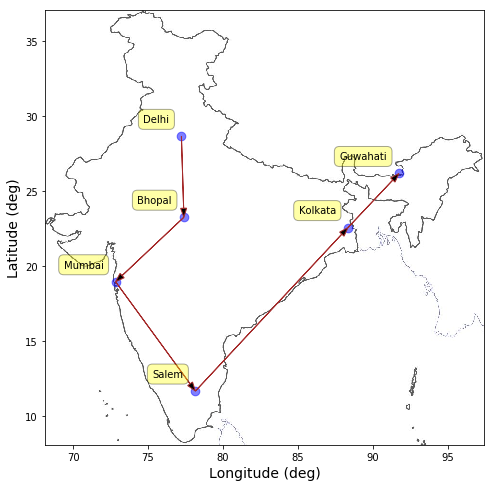

In [10]:
# Visualization of the path in India map
import matplotlib.image as mpimg

India_img = mpimg.imread('India.png')
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
plt.imshow(India_img, extent=[68.11666667, 97.41666667, 8.06666667, 37.1], alpha = 0.65)
plt.ylabel("Latitude (deg)", fontsize=14)
plt.xlabel("Longitude (deg)", fontsize=14)
plt.scatter(Longitude, Latitude, marker='o', s = 75, color = 'b',  alpha = 0.5)
for w, x, y in zip(city_sequence, Longitude, Latitude):
    plt.annotate(
        w,
        xy=(x, y), xytext=(-12, 12),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.35))
    

arrow_base_x = Longitude[:-1]
arrow_base_y = Latitude[:-1]
arrow_tip_x = [t - s for s, t in zip(Longitude, Longitude[1:])]
arrow_tip_y = [t - s for s, t in zip(Latitude, Latitude[1:])]

for w, x, y, z in zip(arrow_base_x, arrow_base_y, arrow_tip_x, arrow_tip_y):
    ax.arrow(w, x, y, z, head_width=0.4, head_length=0.6, fc='k', ec='brown',length_includes_head = True)


fig.savefig('Result.png',  dpi = 400)
plt.show()